<a href="https://colab.research.google.com/github/MamidiPravallikaReddy/ML-LAB/blob/main/ML_Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Shape: (569, 30)

Checking for null values in the dataset:

Total null values in dataset: 0

Training set size: (455, 30)
Testing set size: (114, 30)

--- Original Random Forest ---
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Fitting 3 folds for each of 24 candidates, totalling 72 fits

--- Tuned Random Forest ---
Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.9649122807017544
Confusion Matrix:
 [[40  3]
 [ 1 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95   

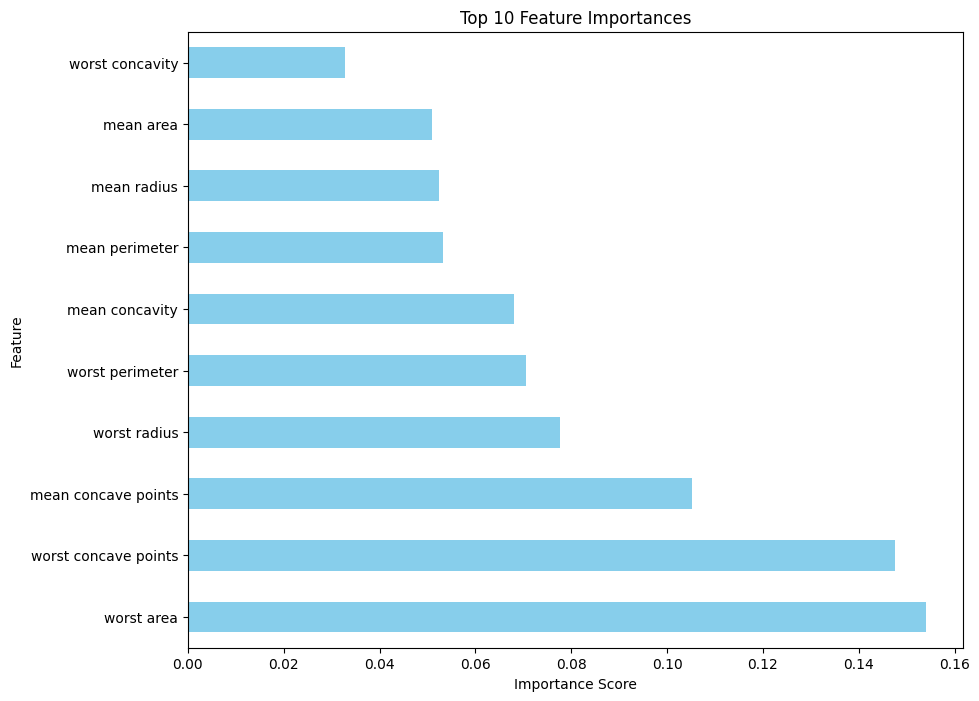

In [9]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

print("Dataset Shape:", X.shape)

print("\nChecking for null values in the dataset:")
X.isnull().sum()
print("\nTotal null values in dataset:", X.isnull().sum().sum())


X.fillna(X.mean(), inplace=True)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


print("\n--- Original Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=3,
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train, y_train)


best_rf = grid.best_estimator_
y_pred_best = best_rf.predict(X_test)


print("\n--- Tuned Random Forest ---")
print("Best Hyperparameters:", grid.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


feat_importances = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

